## 탐색적 데이터 분석 - MBA 합격 데이터


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 전처리 / 결측값 처리

In [20]:
mba_df = pd.read_csv('./data/MBA.csv')

mba_df.drop('application_id', axis=1, inplace=True)  # 'application_id' 열 삭제

mba_df.loc[mba_df['international'] == True, 'race'] = mba_df['race'].fillna('international')
mba_df.drop('international', axis=1, inplace=True)

mba_df['admission'].fillna('decline', inplace=True)
mba_df['admission'].replace('Waitlist', 'decline', inplace=True)

mba_df

C:\Users\playdata\AppData\Local\Temp\ipykernel_31252\3743120216.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mba_df['admission'].fillna('decline', inplace=True)


,gender,gpa,major,race,gmat,work_exp,work_industry,admission
0,Female,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,Male,3.28,Humanities,Black,680.0,5.0,Investment Management,decline
2,Female,3.30,Business,international,710.0,5.0,Technology,Admit
3,Male,3.47,STEM,Black,690.0,6.0,Technology,decline
4,Male,3.35,STEM,Hispanic,590.0,5.0,Consulting,decline
...,...,...,...,...,...,...,...,...
6189,Male,3.49,Business,White,640.0,5.0,Other,decline
6190,Male,3.18,STEM,Black,670.0,4.0,Consulting,decline
6191,Female,3.22,Business,international,680.0,5.0,Health Care,Admit
6192,Male,3.36,Business,international,590.0,5.0,Other,decline


In [21]:
mba_df.describe()

,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


In [22]:
mba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         6194 non-null   object 
 1   gpa            6194 non-null   float64
 2   major          6194 non-null   object 
 3   race           6194 non-null   object 
 4   gmat           6194 non-null   float64
 5   work_exp       6194 non-null   float64
 6   work_industry  6194 non-null   object 
 7   admission      6194 non-null   object 
dtypes: float64(3), object(5)
memory usage: 387.3+ KB


In [23]:
mba_df.isnull().sum()

gender           0
gpa              0
major            0
race             0
gmat             0
work_exp         0
work_industry    0
admission        0
dtype: int64

In [24]:
mba_df['major'].value_counts()


major
Humanities    2481
STEM          1875
Business      1838
Name: count, dtype: int64

### 범주형 특성 인코딩

- One-hot Encoding, Label Encoding
    
- **label encoding →** gender
    
- **one-hot encoding →**  major, race, work_industry

In [25]:
from sklearn.preprocessing import LabelEncoder

# 각각의 열에 대해 별도의 라벨 인코더 생성
# gender 라벨 인코딩
gender_encoder = LabelEncoder()
mba_df['gender'] = gender_encoder.fit_transform(mba_df['gender'])

# major 라벨 인코딩
major_encoder = LabelEncoder()
mba_df['major'] = major_encoder.fit_transform(mba_df['major'])

# race 라벨 인코딩
race_encoder = LabelEncoder()
mba_df['race'] = race_encoder.fit_transform(mba_df['race'])

# work_industry 라벨 인코딩
work_industry_encoder = LabelEncoder()
mba_df['work_industry'] = work_industry_encoder.fit_transform(mba_df['work_industry'])

# admission 라벨링
mba_df['admission'] = mba_df['admission'].replace({'decline': 0, 'Admit': 1})


# 결과 확인
print(mba_df.head())

   gender   gpa  major  race   gmat  work_exp  work_industry  admission
0       0  3.30      0     0  620.0       3.0              3          1
1       1  3.28      1     1  680.0       5.0              6          0
2       0  3.30      0     5  710.0       5.0             13          1
3       1  3.47      2     1  690.0       6.0             13          0
4       1  3.35      2     2  590.0       5.0              1          0


C:\Users\playdata\AppData\Local\Temp\ipykernel_31252\1414636997.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mba_df['admission'] = mba_df['admission'].replace({'decline': 0, 'Admit': 1})


In [26]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# 
# # 라벨인코더
# label_encoder = LabelEncoder()
# mba_df['gender'] = label_encoder.fit_transform(mba_df['gender'])
# 
# # 원핫인코더
# 
# encoder = OneHotEncoder(sparse_output=False)
# temp = pd.DataFrame(mba_df['major'])
# encoded_major = encoder.fit_transform(temp)
# encoded_major_df = pd.DataFrame(encoded_major, columns = encoder.get_feature_names_out(['major']))
# mba_df = pd.concat([mba_df, encoded_major_df], axis=1)
# mba_df.drop('major', axis=1, inplace = True)  # 원본 major 열 삭제
# 
# encoder = OneHotEncoder(sparse_output=False)
# temp = pd.DataFrame(mba_df['race'])
# encoded_race = encoder.fit_transform(temp)
# encoded_race_df = pd.DataFrame(encoded_race, columns = encoder.get_feature_names_out(['race']))
# mba_df = pd.concat([mba_df, encoded_race_df], axis=1)
# mba_df.drop('race', axis=1, inplace=True)  # 원본 race 열 삭제
# 
# encoder = OneHotEncoder(sparse_output=False)
# temp = pd.DataFrame(mba_df['work_industry'])
# encoded_work_industry = encoder.fit_transform(temp)
# encoded_work_industry_df = pd.DataFrame(encoded_work_industry, columns = encoder.get_feature_names_out(['work_industry']))
# mba_df = pd.concat([mba_df, encoded_work_industry_df], axis = 1)
# mba_df.drop('work_industry', axis=1, inplace=True)  # 원본 work_industry 열 삭제
# 
# # oh_encoder = OneHotEncoder(sparse_output=False) # 넘파이 배열 반환
# # categorical_data = mba_df[['major', 'race', 'work_industry']]
# # 
# # ohe_encoded = oh_encoder.fit_transform(categorical_data) # 인코딩 후 데이터
# # new_categorical = pd.DataFrame(ohe_encoded, columns=oh_encoder.get_feature_names_out(['major', 'race', 'work_industry']))
# # mba_df = pd.concat([mba_df, new_categorical], axis=1) # 합치기
# # mba_df = mba_df.drop(['major', 'race', 'work_industry'], axis=1)
# # 
# 
# mba_df

### 변수들 간 관계 파악

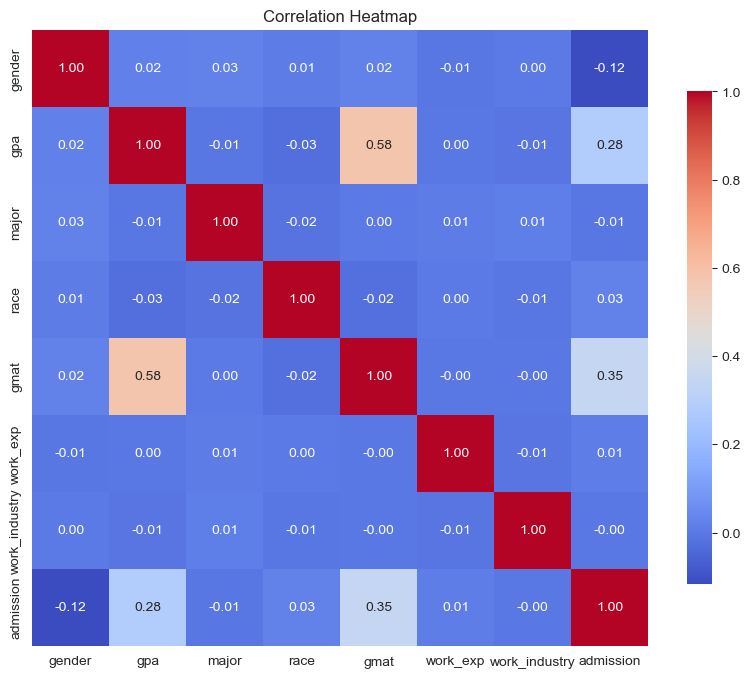

In [50]:
# heatmap
# 상관행렬 계산
correlation_matrix = mba_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

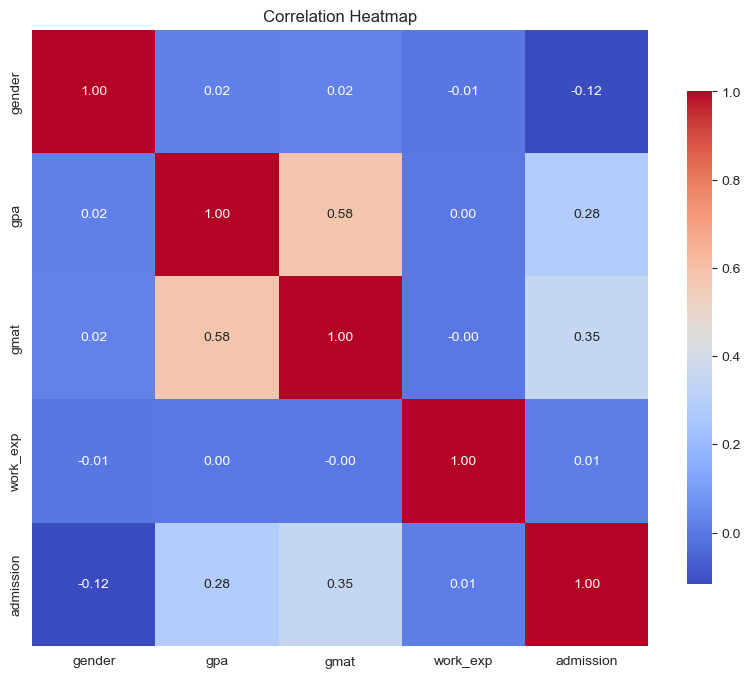

In [53]:
# heatmap
# 상관행렬 계산
mba_numerical = mba_df[['gender', 'gpa', 'gmat', 'work_exp', 'admission']]
correlation_matrix = mba_numerical.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

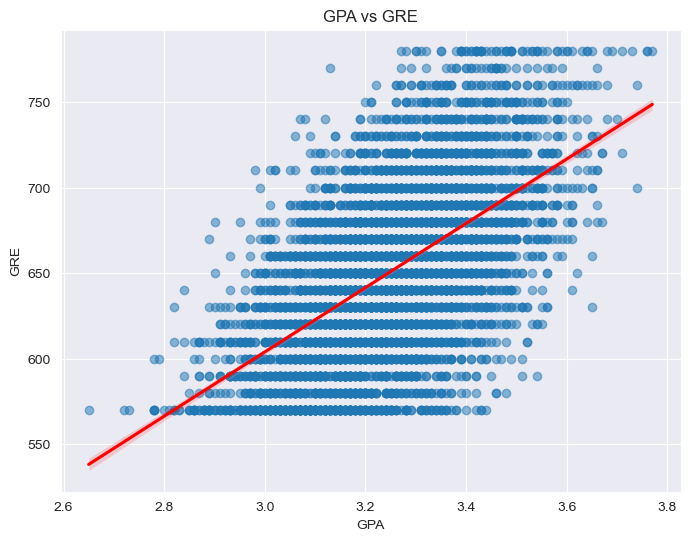

In [28]:
# 산점도
plt.figure(figsize=(8, 6))
sns.regplot(data=mba_df, x='gpa', y='gmat', scatter_kws = {'alpha':0.5}, line_kws={'color':'red'})
plt.title('GPA vs GRE')
plt.xlabel('GPA')
plt.ylabel('GRE')
plt.grid(True)
plt.show()

조건부 분포 통계:
                mean       std  count
admission                           
0          3.233007  0.148282   5294
1          3.354867  0.126637    900


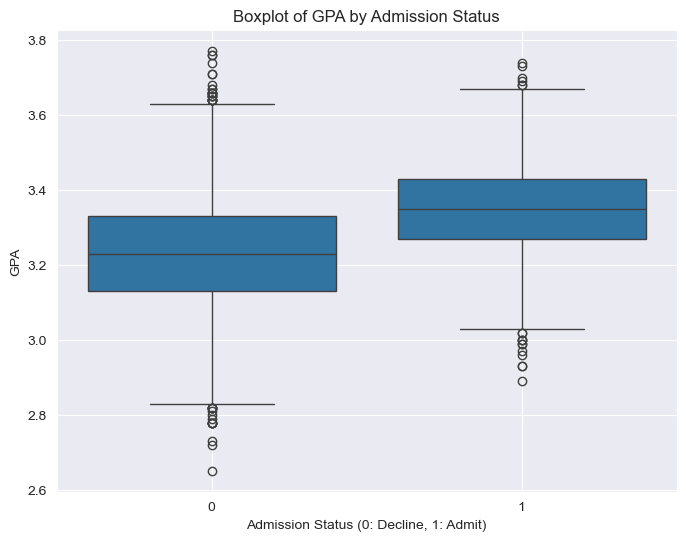

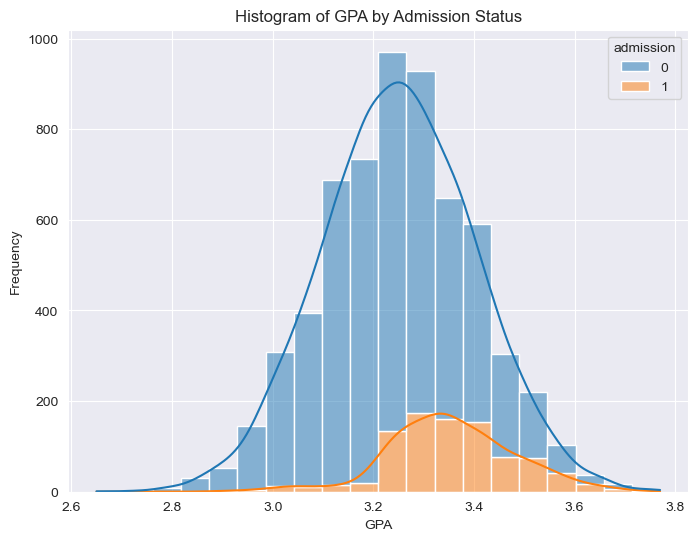

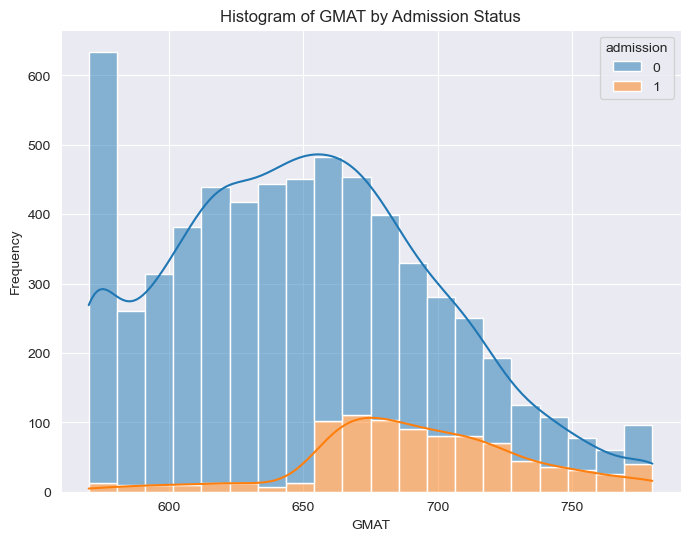

In [29]:
# 조건부 분포와 대표값, 분산 확인
summary_stats = mba_df.groupby('admission')['gpa'].agg(['mean', 'std', 'count'])
print("조건부 분포 통계:\n", summary_stats)

# 상자그림 
plt.figure(figsize=(8, 6))
sns.boxplot(data=mba_df, x='admission', y='gpa')
plt.title('Boxplot of GPA by Admission Status')
plt.xlabel('Admission Status (0: Decline, 1: Admit)')
plt.ylabel('GPA')
plt.grid(True)
plt.show()

# 히스토그램 
plt.figure(figsize=(8, 6))
sns.histplot(data=mba_df, x='gpa', hue='admission', multiple='stack', bins=20, kde=True)
plt.title('Histogram of GPA by Admission Status')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 히스토그램 2
plt.figure(figsize=(8, 6))
sns.histplot(data=mba_df, x='gmat', hue='admission', multiple='stack', bins=20, kde=True)
plt.title('Histogram of GMAT by Admission Status')
plt.xlabel('GMAT')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()